# HW#4 - benstan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/spambase.csv"
SpamData = pd.read_csv(url)
SpamData.head()
SpamData.shape

(4601, 58)

In [3]:
X = SpamData.copy()
del X['is_spam']
y = SpamData['is_spam']

#### Earlier in this course, we used logistic regression model and could achieve 8.2% misclassification error. Now, you know a little bit of higher end algorithms like Random Forest and boosting. Go ahead and beat Logistic regression algorithm. The champion, the person who beats CV-error of 8.2% and makes the least amount of error will receive a ONE DOLLAR bill award! 

In order to be consistent, use the following way to cross-validate your errors:

from sklearn import cross_validation

kf = cross_validation.KFold(len(SpamData), n_folds = 10, shuffle = True) 

scores = []

for train_index, test_index in kf: ...                                  

### Method 1: Random Forest

    num_features  oob_scores
0              1    0.924147
1              6    0.944143
2             11    0.946099
3             16    0.944577
4             21    0.945012
5             26    0.945012
6             31    0.943056
7             36    0.944360
8             41    0.943708
9             46    0.944143
10            51    0.943925
11            56    0.942621


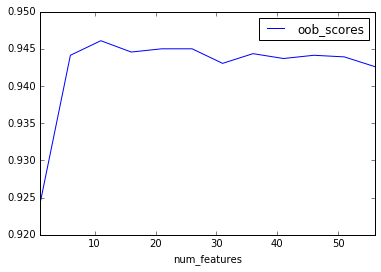

In [4]:
# Start with random forect classifier; tune for number of features to consideer at each node
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
num_features = range(1,58,5)
oob_score_RF = []
for i in num_features:
    rf = RandomForestClassifier(n_estimators=1000,max_features=i,min_samples_leaf=5,oob_score=True)
    rf.fit(X,y)
    oob_score_RF.append(rf.oob_score_)

oob_score_df = pd.DataFrame({'num_features':num_features,'oob_scores':oob_score_RF})
print oob_score_df
oob_score_df.plot(x='num_features',y='oob_scores')

   num_features  oob_scores
0             7    0.943708
1             8    0.945012
2             9    0.944795
3            10    0.944795
4            11    0.944143
5            12    0.945012
6            13    0.944795
7            14    0.944360
8            15    0.945881


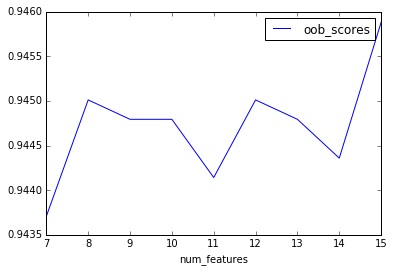

In [5]:
# Zoom in to determine more precise number of features
num_features = range(7,16)
oob_score_RF = []
for i in num_features:
    rf = RandomForestClassifier(n_estimators=1000,max_features=i,min_samples_leaf=5,oob_score=True)
    rf.fit(X,y)
    oob_score_RF.append(rf.oob_score_)

oob_score_df = pd.DataFrame({'num_features':num_features,'oob_scores':oob_score_RF})
print oob_score_df
oob_score_df.plot(x='num_features',y='oob_scores')

##### Eight or ten appears to be the best number of features to use

In [6]:
# Now tune for number of trees to use in random forest
num_trees = [1000,2000,5000,10000]
oob_score_RF = []
for i in num_trees:
    rf = RandomForestClassifier(n_estimators=i,max_features=10,min_samples_leaf=5,oob_score=True)
    rf.fit(X,y)
    oob_score_RF.append(rf.oob_score_)
    
oob_score_df = pd.DataFrame({'num_trees':num_trees,'oob_scores':oob_score_RF})
print oob_score_df

   num_trees  oob_scores
0       1000    0.945447
1       2000    0.944795
2       5000    0.945012
3      10000    0.945229


#### Minimal difference after 1000 trees

   num_samples  oob_scores
0            1    0.952619
1            2    0.950880
2            3    0.948489
3            4    0.945012
4            5    0.944795
5            6    0.941534
6            7    0.941317
7            8    0.940882
8            9    0.939578
9           10    0.939144


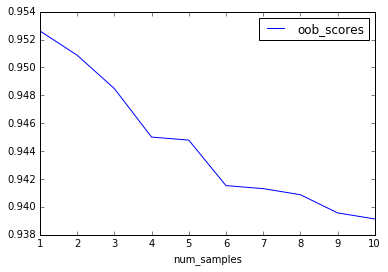

In [7]:
# Lastly, tune for number of samples to include at terminal nodes in random forest
num_samples = range(1,11)
oob_score_RF = []
for i in num_samples:
    rf = RandomForestClassifier(n_estimators=1000,max_features=10,min_samples_leaf=i,oob_score=True)
    rf.fit(X,y)
    oob_score_RF.append(rf.oob_score_)
    
oob_score_df = pd.DataFrame({'num_samples':num_samples,'oob_scores':oob_score_RF})
print oob_score_df
oob_score_df.plot(x='num_samples',y='oob_scores')

In [8]:
from sklearn import cross_validation
rf = RandomForestClassifier(n_estimators=1000,max_features=10,min_samples_leaf=1,oob_score=True)
kf = cross_validation.KFold(len(SpamData),n_folds = 10,shuffle = True) 
scores = []
for train_index, test_index in kf:
    rf.fit(X.iloc[train_index],y.iloc[train_index])
    scores.append(rf.score(X.iloc[test_index],y.iloc[test_index]))
print "Misclassification error:",1-np.mean(scores)

Misclassification error: 0.0465132509667


#### Woohoo! Got 4.7% misclassification error!

### Method 2: Boosted Trees

   depth    scores
0      1  0.915451
1      3  0.939580
2      5  0.944359
3      7  0.947405


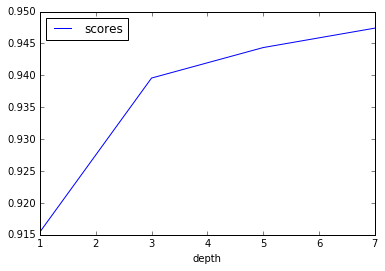

In [9]:
# Begin tuning boosted tree; start with depth parameter
from sklearn.ensemble import GradientBoostingClassifier
depth = [1,3,5,7]
scores = []
for i in depth:
    gbc = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500,max_depth=i,min_samples_leaf=5)
    kf = cross_validation.KFold(len(SpamData),n_folds=10,shuffle = True) 
    cv_scores = []
    for train_index, test_index in kf:
        gbc.fit(X.iloc[train_index],y.iloc[train_index])
        y_hat_test = gbc.predict(X.iloc[test_index])
        cv_scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))
    scores.append(np.mean(cv_scores))

depth_choice_df = pd.DataFrame({'depth':depth,'scores':scores})
print depth_choice_df
depth_choice_df.plot(x='depth',y='scores')

#### Depth of three or five appears to be best

   num_trees    scores
0        100  0.927845
1        500  0.945013
2       1000  0.949574
3       5000  0.956531
4      10000  0.956965


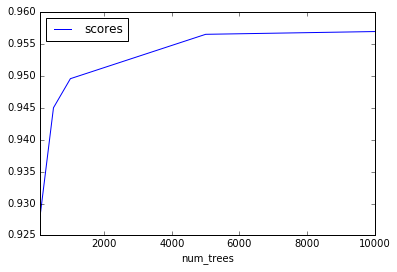

In [10]:
num_trees = [100,500,1000,5000,10000]
scores = []
for i in num_trees:
    gbc = GradientBoostingClassifier(learning_rate=0.01,n_estimators=i,max_depth=5,min_samples_leaf=5)
    kf = cross_validation.KFold(len(SpamData),n_folds = 10,shuffle = True) 
    cv_scores = []
    for train_index, test_index in kf:
        gbc.fit(X.iloc[train_index],y.iloc[train_index])
        y_hat_test = gbc.predict(X.iloc[test_index])
        cv_scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))
    scores.append(np.mean(cv_scores))

depth_choice_df = pd.DataFrame({'num_trees':num_trees,'scores':scores})
print depth_choice_df
depth_choice_df.plot(x='num_trees',y='scores')

#### Appears to level off after 1000 trees

In [12]:
gbc = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000,max_depth=5,min_samples_leaf=1)
kf = cross_validation.KFold(len(SpamData),n_folds=10,shuffle = True) 
cv_scores = []
for train_index, test_index in kf:
    gbc.fit(X.iloc[train_index],y.iloc[train_index])
    y_hat_test = gbc.predict(X.iloc[test_index])
    cv_scores.append(float(sum(y_hat_test == y.iloc[test_index]))/len(y_hat_test))
print "Misclassification error:",1-np.mean(cv_scores)

Misclassification error: 0.0475978496652


#### Got 4.7% misclassification error! Either method yields an improvement over logistic regression and approximately the same result.